Estimate the binding fluxes using the methods in Hammes, G. G., Chang, Y.-C., & Oas, T. G. (2009). Conformational selection or induced fit: a flux description of reaction mechanism. Proceedings of the National Academy of Sciences of the United States of America, 106(33), 13737–13741. http://doi.org/10.1073/pnas.0907195106

In [1]:
def solve_free_protein(mdm2_tot,p53_tot,k_d_w,k_d_t,k_eq_wt,alpha=1.):
    k_d_w *= alpha
    k_d_t *= alpha
    a = 1./k_d_w+k_eq_wt/k_d_t
    b = 1.+k_eq_wt-mdm2_tot/k_d_w-k_eq_wt/k_d_t*mdm2_tot+p53_tot/k_d_w+p53_tot*k_eq_wt/k_d_t
    c = -(1.+k_eq_wt)*mdm2_tot
    #print a,b,c
    mdm2_free1 = (-b+(b*b-4.*a*c)**0.5)/(2.*a)
    mdm2_free2 = (-b-(b*b-4.*a*c)**0.5)/(2.*a)
    return max(mdm2_free1,mdm2_free2)

In [2]:
def estimate_flux(p53_tot,k_wt,k_d_w,k_d_t,k_on_t,k_on_w,k_wt_l,mdm2_free):

    p53_w_unbound = p53_tot/(1+mdm2_free/k_d_w+k_eq_wt+k_eq_wt/k_d_t*mdm2_free)
    p53_t_unbound = k_eq_wt*p53_w_unbound
    p53_w_bound = p53_w_unbound/k_d_w*mdm2_free
    #p53_t_bound = k_eq_wt*p53_w_unbound/k_d_t*mdm2_free

    flux_cs = (1/(k_wt*p53_w_unbound)+1/(k_on_t*p53_t_unbound*mdm2_free))**-1
    flux_if = (1/(k_on_w*p53_w_unbound*mdm2_free+1/k_wt_l*p53_w_bound))**-1

    return flux_cs,flux_if

Rates and concentrations from the reference PNAS paper, Figure 3

In [3]:
#c_p53 = 20e-6
#k_d_w = 580./1e8
#k_d_t = 0.025/3e4
#k_eq_wt = 46./0.005

Rates and concentrations from our simulation. Rates are estimated using TPT

In [4]:
c_p53 = 7.1*10**-3 #Mol
c_mdm2 = 7.1*10**-3
# k_off_w/k_on_w = k_unfold_bound_to_unfold_unbound/k_unfold_unbound_to_unfold_bound
#                = 7.120e+06/1.537e+07
k_d_w = 7.120e+06/8.980e+09
# k_off_t/k_on_t = k_fold_bound_to_fold_unbound/k_fold_unbound_to_fold_bound
#                = 1.704e+06/6.565e+06
k_d_t = 1.704e+06/4.709e+10
# k_eq_wt = k_w_to_t/k_t_to_w = k_unfold_unbound_to_fold_unbound/k_fold_unbound_to_unfold_unbound
#                = 6.145e+05/2.162e+06
k_eq_wt = 6.145e+05/2.162e+06
#k_on_t = k_fold_unbound_to_fold_bound = 4.709e+10 1/(M*s)
k_on_t = 4.709e+10
#k_on_w = k_unfold_unbound_to_unfold_bound = 8.980e+09 1/(M*s)
k_on_w = 8.980e+09
#k_wt_l= k_w_to_t_bound = k_unfold_bound_to_fold_bound = 3.126e+06
k_wt_l = 3.126e+06
#k_wt = k_w_to_t_unbound = k_unfold_unbound_to_fold_unbound = 6.145e+05
k_wt = 6.145e+05

In [5]:
mdm2_free = solve_free_protein(mdm2_tot=c_p53, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
print mdm2_free

0.000932156612795


In [6]:
print estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)

(425.0972637910741, 6075.920995680314)


## Fixed the concentration of p53 and vary the concentration of MDM2

### p53 concentration = 7.1 mM from our simulation

In [7]:
import numpy as np

concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio = []

for c_mdm2 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=c_mdm2, p53_tot=7.1e-3,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    #print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio.append(flux_cs/(flux_cs+flux_if))
    

### p53 concentration = 7.1 uM

In [8]:
flux_ratio1 = []

for c_mdm2 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=c_mdm2, p53_tot=7.1e-6,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    #print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio1.append(flux_cs/(flux_cs+flux_if))
    

In [9]:
%matplotlib inline

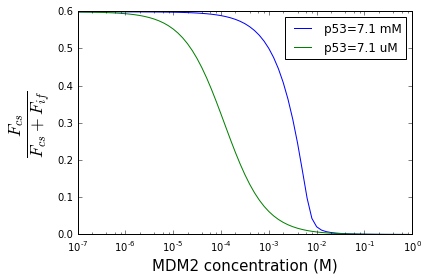

In [10]:
import matplotlib.pyplot as plt

plt.plot(concentrations,flux_ratio)
plt.plot(concentrations,flux_ratio1)
plt.ylabel(r"$\frac{F_{cs}}{F_{cs}+F_{if}}$",fontsize=25)
plt.xlabel(r"MDM2 concentration (M)",fontsize=15)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend(["p53=7.1 mM","p53=7.1 uM"],loc='best')
plt.xscale('log')


## Fixed the concentration of MDM2 and vary the concentration of p53

### mdm2 = 7.1 mM from simulation

In [11]:
import numpy as np

concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio = []

for c_p53 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=7.1e-3, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    #print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio.append(flux_cs/(flux_cs+flux_if))

### mdm2 = 7.1 uM 

In [12]:
concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio1 = []

for c_p53 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=7.1e-6, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    #print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio1.append(flux_cs/(flux_cs+flux_if))


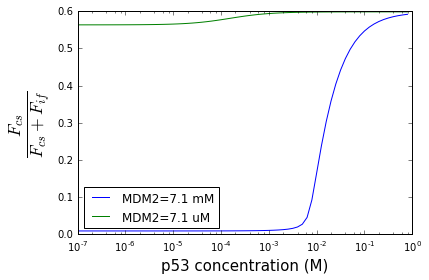

In [13]:
import matplotlib.pyplot as plt

plt.plot(concentrations,flux_ratio)
plt.plot(concentrations,flux_ratio1)
plt.ylabel(r"$\frac{F_{cs}}{F_{cs}+F_{if}}$",fontsize=25)
plt.xlabel(r"p53 concentration (M)",fontsize=15)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend(["MDM2=7.1 mM","MDM2=7.1 uM"],loc='best')
plt.xscale('log')